In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/chinen/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [34]:
x = np.array([-2.5,  -2, -1.76,  -1, -0.2, 0.5, 0.8, 1.0, 1.1])
y = np.array([4.21, 2.5,  1.4, 1.37, 2.29, 2.4, 3.98, 1.2, 0.99])

**Exercício 1:** Faça regressões lineares sobre esses dados, utilizando as seguintes configurações:

- Uma reta
- Um polinômio de grau 2 com penalidade Lasso
- A regressão que achar mais adequada.

Visualize as três regressões.

Existem pontos nesse conjunto que você consideraria um _outlier_?

Considere a base de dados Wine, contém a classificação de vinhos de acordo com algumas propriedades numéricas, presente no pacote `sklearn.datasets`.

**Exercício 2:**

1. Separe os dados da base Wine entre treino e teste, com 60% dos dados para treino e 40% para teste
2. Crie uma árvore de classificação utilizando os dados de treino, com altura máxima 4
3. Visualize as regras da árvore treinada
4. Calcule a matriz de confusão do modelo


In [5]:
df = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
df['target'] = load_wine().target

R^2: 0.09056137577324885
Pearson ao quadrado: [0.09056138]
Média do erro absoluto: 0.8761146343725219
Erro quadrático médio: 1.1223685207790413


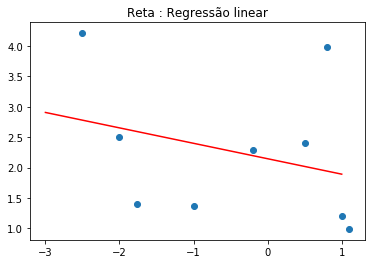

In [16]:
#Exercicio 1
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

x = x.reshape(-1,1)
y = y.reshape(-1,1)

regressorlinear = LinearRegression().fit(x, y)

y0 = regressorlinear.intercept_
m = regressorlinear.coef_[0]

plt.scatter(x, y)

linha = np.linspace(-3,1,2).reshape(-1,1)
plt.title("Reta : Regressão linear")
plt.plot(linha, regressorlinear.predict(linha), c='r')

predito = regressorlinear.predict(x)
print("R^2: "+str(r2_score(y, predito)))

print("Pearson ao quadrado:",str(pearsonr(x, y)[0] ** 2))

print("Média do erro absoluto:",str(mean_absolute_error(y, predito)))

print("Erro quadrático médio:",str(mean_squared_error(y,predito)))

[1.85394674] [0.         0.20897546]
R^2: 0.16996686199875122
Média do erro absoluto: 0.8808376004520734
Média quadrática do erro: 1.024371563378608


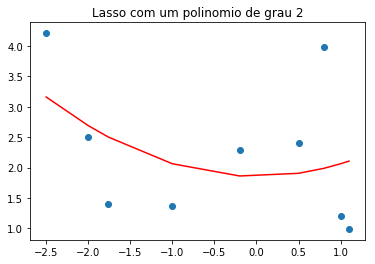

In [20]:
from sklearn.linear_model import LinearRegression, Lasso
#LASSO

x1 = np.array([-2.5,  -2, -1.76,  -1, -0.2, 0.5, 0.8, 1.0, 1.1]).reshape(-1,1)
x2 = x1**2
x = np.hstack([x1, x2])
y = np.array([4.21, 2.5,  1.4, 1.37, 2.29, 2.4, 3.98, 1.2, 0.99]).reshape(-1,1)

regressorlasso = Lasso(alpha = 0.1).fit(x, y)
y0 = regressorlasso.intercept_
m = regressorlasso.coef_
print(y0, m)

curva = regressorlasso.predict(x)

print("R^2:", str(r2_score(y, curva)))
print("Média do erro absoluto:", str(mean_absolute_error(y, curva)))
print("Média quadrática do erro:", str(mean_squared_error(y, curva)))

plt.scatter(x1, y)
plt.title("Lasso com um polinomio de grau 2")
plt.plot(x1, curva, c='red')

R^2: 0.0902349405969034
Pearson ao quadrado: [0.09056138]
Média do erro absoluto: 0.8747468882472965
Erro quadrático médio: 1.1227713853113417


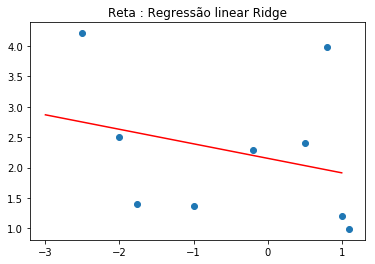

In [32]:
#Regressao de Ridge

from sklearn.linear_model import Ridge

x = np.array([-2.5,  -2, -1.76,  -1, -0.2, 0.5, 0.8, 1.0, 1.1]).reshape(-1,1)
y = np.array([4.21, 2.5,  1.4, 1.37, 2.29, 2.4, 3.98, 1.2, 0.99]).reshape(-1,1)

regressao = Ridge(alpha = 1.0)
regressao.fit(x, y)
y0 = regressao.intercept_
m = regressao.coef_[0]

plt.scatter(x1, y)

linha = np.linspace(-3,1,2).reshape(-1,1)
plt.title("Reta : Regressão linear Ridge")
plt.plot(linha, regressao.predict(linha), c='r')

predito = regressao.predict(x)
print("R^2: "+str(r2_score(y, predito)))

print("Pearson ao quadrado:",str(pearsonr(x, y)[0] ** 2))

print("Média do erro absoluto:",str(mean_absolute_error(y, predito)))

print("Erro quadrático médio:",str(mean_squared_error(y,predito)))

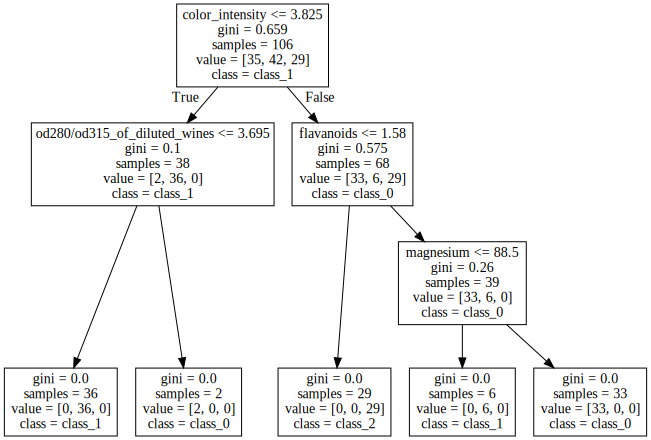

In [9]:
#Exercicio 2
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

df['target'] = pd.Categorical(df['target'])
#Dividindo as amostras em 60% treinamento e 40% teste
train, test = train_test_split(df, stratify = df['target'], train_size=0.6, test_size=0.4)
#Criando a árvore com profundidade máxima = 4
clf = tree.DecisionTreeClassifier(max_depth=4)
#
train_data = train.drop(columns=['target'])

clf = clf.fit(train_data, train['target'])

dot_data = tree.export_graphviz(clf, out_file=None,
                                class_names=list(load_wine().target_names),
                                feature_names=list(load_wine().feature_names),
                                leaves_parallel=True)
graphviz.Source(dot_data)